In [1]:
from __future__ import print_function

import tensorflow as tf
import numpy as np

# Square matrix A of rank 2
A = tf.constant([ [1.,2.], [3.,4.] ])

# 2x2 Square, Diagonal, Symmetric matrix B
B = tf.diag([5.,6.])

# 2x2 Square matrix
C = tf.constant([ [1.,2.], [2.,4.] ])

# 2x1 vector will all elements equal to 1
x = tf.ones([2,1])

# 2x1 vector will all elements equal to 2.0
b = tf.fill([2,1], 2.)

# 2x1 vector
y = tf.constant([ [-1.], [1.] ])

# run within a session and print
with tf.Session() as session:
    print("Tensorflow version: " + tf.__version__)
    tf.global_variables_initializer().run()

    print("A = ")
    print(A.eval())

    print("B = ")
    print(B.eval())

    print("C = ")
    print(C.eval())

    print("x = ")
    print(x.eval())

    print("b = ")
    print(b.eval())

    print("y = ")
    print(y.eval())

    # Tensor multiplication
    print("Ax = ")
    print(tf.matmul(A, x).eval())

    # Tensor addition
    print("A + B =")
    print(tf.add(A, B).eval())

    print("A + b =")
    print(tf.add(A, b).eval())

    # Rank of A and B; Number of indices to identify each element
    print("tensorRank(A) = ")
    print(tf.rank(A).eval())
    print("tensorRank(C) = ")
    print(tf.rank(C).eval())

    # Matrix rank
    print("rank(A) = ")
    print(np.linalg.matrix_rank(A.eval()))
    print("rank(C) = ")
    print(np.linalg.matrix_rank(C.eval()))

    # Transpose
    print("tran(A) = ")
    print(tf.matrix_transpose(A).eval())
    print("tran(B) = ")
    print(tf.matrix_transpose(B).eval())

    # Inverse
    print("inv(A) = ")
    print(tf.matrix_inverse(A).eval())
    # Inverse of diagonal matrix has diag elements of the reciprocal of diag elements B
    print("inv(B) = ")
    print(tf.matrix_inverse(B).eval())
    print("inv(C) = ") # since C has rank 1, this will cause error
    try:
        print(tf.matrix_inverse(C).eval())
    except:
        print("C is not invertible")

    # Product of a matrix and its inverse is an identity (non-singular)
    print("A*inv(A) = Eye(2)")
    print( tf.matmul(A,tf.matrix_inverse(A)).eval() )

    # Element-wise multiplication
    print("elem(A)*elem(B) = ")
    print(tf.multiply(A,B).eval())

    # Element-wise addition
    print("elem(A)+elem(B) = ")
    print(tf.add(A,B).eval())

    # Dot product
    print("x dot b")
    print(tf.matmul(x,b,transpose_a=True).eval())

    # Identity matrix of same shape as A
    print("eye(A) = ")
    I = tf.eye(A.get_shape().as_list()[0],A.get_shape().as_list()[1])
    print(I.eval())

    # Multiply eye(A) and A = A
    print("eye(A)*A = A = ")
    print(tf.matmul(I,A).eval())
    print("A * eye(A) = A = ")
    print(tf.matmul(A, I).eval())

    # l1, l2, Frobenius norm
    print("l1(x) = ")
    print(tf.reduce_sum(tf.abs(x)).eval())
    print("l2(x) = ")
    print(tf.sqrt(tf.reduce_sum(tf.square(x))).eval())
    print("Frobenius(A) = ")
    print(tf.sqrt(tf.reduce_sum(tf.square(A))).eval())
    print("Numpy l2(x) =")
    print(np.linalg.norm(x.eval(session=tf.Session())))
    print("Numpy Forbenius(A) =")
    print(np.linalg.norm(A.eval(session=tf.Session())))

    # Can you write the L(inf) ?

    # Orthogonal vectors; How do you make x and y orthonormal?
    print("x dot y")
    print(tf.matmul(x,y,transpose_a=True).eval())

    # Eigenvalues and eigenvectors
    print("Numpy Eigenvalues of (A)=")
    e, v = np.linalg.eig(A.eval())
    print(e)
    print("Numpy Eigenvectors of (A)=")
    print(v)

    # Frobenius norm is equal to the trace of A*tran(A)
    print("Frobenius(A) = Tr(A*tran(A) = ")
    print(tf.sqrt(tf.trace(tf.matmul(A,tf.transpose(A)))).eval())

    # Determinant of A is the product of its eigenvalues
    print("det(A)=")
    print(tf.matrix_determinant(A).eval())
    # Determinant from eigenvalues
    print("det(A) as product of eigenvalues")
    print(tf.reduce_prod(e).eval())

Tensorflow version: 1.2.0
A = 
[[ 1.  2.]
 [ 3.  4.]]
B = 
[[ 5.  0.]
 [ 0.  6.]]
C = 
[[ 1.  2.]
 [ 2.  4.]]
x = 
[[ 1.]
 [ 1.]]
b = 
[[ 2.]
 [ 2.]]
y = 
[[-1.]
 [ 1.]]
Ax = 
[[ 3.]
 [ 7.]]
A + B =
[[  6.   2.]
 [  3.  10.]]
A + b =
[[ 3.  4.]
 [ 5.  6.]]
tensorRank(A) = 
2
tensorRank(C) = 
2
rank(A) = 
2
rank(C) = 
1
tran(A) = 
[[ 1.  3.]
 [ 2.  4.]]
tran(B) = 
[[ 5.  0.]
 [ 0.  6.]]
inv(A) = 
[[-2.00000024  1.00000012]
 [ 1.50000012 -0.50000006]]
inv(B) = 
[[ 0.2         0.        ]
 [ 0.          0.16666667]]
inv(C) = 
C is not invertible
A*inv(A) = Eye(2)
[[  1.00000000e+00   0.00000000e+00]
 [ -4.76837158e-07   1.00000024e+00]]
elem(A)*elem(B) = 
[[  5.   0.]
 [  0.  24.]]
elem(A)+elem(B) = 
[[  6.   2.]
 [  3.  10.]]
x dot b
[[ 4.]]
eye(A) = 
[[ 1.  0.]
 [ 0.  1.]]
eye(A)*A = A = 
[[ 1.  2.]
 [ 3.  4.]]
A * eye(A) = A = 
[[ 1.  2.]
 [ 3.  4.]]
l1(x) = 
2.0
l2(x) = 
1.41421
Frobenius(A) = 
5.47723
Numpy l2(x) =
1.41421
Numpy Forbenius(A) =
5.47723
x dot y
[[ 0.]]
Numpy Eigenvalue

In [2]:
from __future__ import print_function

import tensorflow as tf
import numpy as np
import numpy.linalg as la

print("Tensorflow version: " + tf.__version__)
# Real symmetric matrix S of rank 2
S = tf.constant([ [1.,2.], [2.,1.] ])
print("S = ")
print(S.eval(session=tf.Session()))

# Eigen Decomposition - for square symmetric matrices only
# self_adjoint_eig works only bec symmetric matrix is equal to its self adjoint
# otherwise, use np.linalg.eig
e,Q = tf.self_adjoint_eig(S)
# Diagonal matrix made of eigenvalues of S
V = tf.diag(e)
# S_ = S since S = Q*V*tran(Q) for real symmetric matrix
S_ = tf.matmul(Q,tf.matmul(V,Q))
print("S_ = S = ")
print(S_.eval(session=tf.Session()))

# SVD decomposition
d, U, V1 = tf.svd(S, full_matrices=True, compute_uv=True)
# U and V1 are orthogonal matrices; I must be therefore an identity matrix
I = tf.matmul(U,tf.transpose(V1))
print("I = ")
print(I.eval(session=tf.Session()))
D = tf.diag(d)
# S_ = S since S = U*D*tran(V1)
print("S_ = S = ")
S_ = tf.matmul(U,tf.matmul(D,tf.transpose(V1)))
print(S_.eval(session=tf.Session()))

# Moore-Penrose pseudoinverse
# For non-square matrices, padding of m-n zero columns needed (see linear_inv.y)
D = tf.transpose(tf.diag(np.reciprocal(d)))
print("pseudo_inv(S) = ")
S_ = tf.matmul(V1,tf.matmul(D,tf.transpose(U)))
print(S_.eval(session=tf.Session()))

# inverse of S BUT applicable to non-singular square matrices only
print("inv(S) = ")
print(tf.matrix_inverse(S).eval(session=tf.Session()))

Tensorflow version: 1.2.0
S = 
[[ 1.  2.]
 [ 2.  1.]]
S_ = S = 
[[ 0.99999994  1.99999976]
 [ 1.99999976  0.99999994]]
I = 
[[ 0.          0.99999994]
 [ 0.99999994  0.        ]]
S_ = S = 
[[ 0.99999994  1.99999976]
 [ 1.99999976  0.99999994]]
pseudo_inv(S) = 
[[-0.33333331  0.66666669]
 [ 0.66666669 -0.33333331]]
inv(S) = 
[[-0.33333334  0.66666669]
 [ 0.66666669 -0.33333334]]


In [4]:
from __future__ import print_function

import tensorflow as tf

# Temporary directory for storing data for plotting using TensorBoard
logs_path = '/tmp/tensorflow_logs/normal'

print("Tensorflow version: " + tf.__version__)

# Generate N=100k samples from Gaussian or Normal dist; mean=0.0, std=1.0
with tf.name_scope('normal'):
    normal_dist = tf.Variable(tf.random_normal([100000]))
    # normal_dist = tf.mul(A,[1])

# Generate N=100k samples from Uniform dist; min=0, max=None
with tf.name_scope('uniform'):
    uniform_dist = tf.Variable(tf.random_uniform([100000]))
    # uniform_dist = tf.mul(B,[1])

# Generate a multinomial with 4 categories (ie 0,1,2,3), 100 samples
with tf.name_scope('multinomial'):
    multi_dist = tf.Variable(tf.multinomial([[1.,1.,1.,1.]],100000))
    # multi_dist = C # tf.mul(C,[1])

# Create a summary to monitor normal dist
tf.summary.histogram("normal", normal_dist)
# Create a summary to monitor uniform dist
tf.summary.histogram("uniform", uniform_dist)
# Create a summary to monitor multinomial dist
tf.summary.histogram("multinomial", multi_dist)

# Merge all summaries into a single op
merged = tf.summary.merge_all()

# Summary writer
with tf.Session() as session:
    tf.global_variables_initializer().run()
    # Logs to Tensorboard
    writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    for i in range(2):
        _, _, _, summary = session.run([normal_dist,uniform_dist,multi_dist, merged])
        writer.add_summary(summary,i)
    print("Run on command line.")
    print("\ttensorboard --logdir=/tmp/tensorflow_logs/normal ")
    print("Point your web browser to: http://localhost:6006/")

Tensorflow version: 1.2.0
Run on command line.
	tensorboard --logdir=/tmp/tensorflow_logs/normal 
Point your web browser to: http://localhost:6006/


10 : Loss=6.5,  Predicted Parameters = [[ 3.60352397]
 [-3.35825634]
 [ 9.81227779]]
20 : Loss=0.1,  Predicted Parameters = [[  2.31394315]
 [ -3.51630354]
 [ 12.02575684]]
30 : Loss=0.0,  Predicted Parameters = [[  2.07321882]
 [ -3.52767754]
 [ 12.32851791]]
40 : Loss=0.0,  Predicted Parameters = [[  2.00376916]
 [ -3.52944374]
 [ 12.46240139]]
50 : Loss=0.0,  Predicted Parameters = [[  2.00913358]
 [ -3.50743699]
 [ 12.4890337 ]]
60 : Loss=0.0,  Predicted Parameters = [[  2.00039959]
 [ -3.50175714]
 [ 12.49673462]]
70 : Loss=0.0,  Predicted Parameters = [[  2.00036216]
 [ -3.50024128]
 [ 12.49934578]]
80 : Loss=0.0,  Predicted Parameters = [[  2.0000627 ]
 [ -3.50005794]
 [ 12.49982738]]
90 : Loss=0.0,  Predicted Parameters = [[  2.00000739]
 [ -3.50001025]
 [ 12.49994469]]
100 : Loss=0.0,  Predicted Parameters = [[  2.00000858]
 [ -3.50000453]
 [ 12.49998379]]


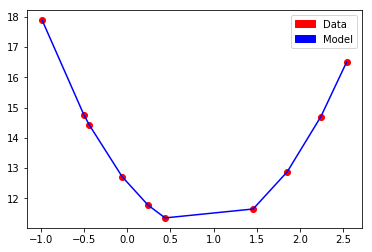

In [9]:
from __future__ import print_function

import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

# Tunable parameters (Try changing the values and see what happens)
# Variable samples >= 3 ; stddev > 0.; xcoeff are real numbers
samples = 10
stddev = 1.0
# xcoeff should be predicted by the model, yp
xcoeff = tf.transpose(tf.constant([[2., -3.5, 12.5]]))
learning_rate = 0.1

# The computation
# We get elements of A by sampling a normal distribution
# a = tf.random_normal([samples,1],stddev=stddev)
a = tf.random_normal([1, samples],stddev=stddev)
# a = tf.Variable(tf.random_normal([1, samples],stddev=stddev))
# Sort to produce a nice plot later
b, _ = tf.nn.top_k(a,k=samples)
# Correct the shape
a = tf.reshape(b,[samples,1])

# Inputs to form y = a*a*xp[0] + a*xp[1] + xp[2], xp[] are the weights
A = tf.concat([tf.concat([a*a,a],1),tf.ones_like(a)],1)

# Initial guess on coefficients of predicted linear model
xp = tf.Variable(tf.random_uniform([3,1], -1.0, 1.0))

# Predicted Model
yp = tf.matmul(A,xp)

# Observed outputs
y = tf.matmul(A,xcoeff)


# The smaller the loss, the closer our prediction to the observed outputs
# The loss model used is square of error (yp - y)
# Miinimization of loss is done by Gradient Descent
loss = tf.reduce_mean(tf.square(yp - y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
train_step = optimizer.minimize(loss)

init = tf.global_variables_initializer()
with tf.Session() as session:
    session.run(init)
    for i in range(100):
        session.run(train_step)
        if ((i+1) % 10) == 0:
            print("%d : Loss=%0.1lf,  Predicted Parameters = %s" % (i+1, loss.eval(), session.run(xp)))
    # Let's plot
    # Note we have to resample a and save in a constant array a
    # Before this, everytime you call a.eval(), it is resampled
    a = np.array(a.eval())
    A = tf.concat([tf.concat([a*a,a],1),tf.ones_like(a)],1)
    yp = tf.matmul(A,xp)
    y = tf.matmul(A,xcoeff)
    plt.plot(a, y.eval(), 'ro', a, yp.eval(), 'b')
    red = mpatches.Patch(color='red', label='Data')
    blue = mpatches.Patch(color='blue', label='Model')
    plt.legend(handles=[red,blue])
    plt.show()

In [30]:
sess = tf.Session()
t1 = [[1, 2, 3], [4, 5, 6]]
t2 = [[7, 8, 9], [10, 11, 12]]
tmp = tf.concat([t1, t2], 1) #==> [[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]]
tf.concat([t1, t2], 1) #==> [[1, 2, 3, 7, 8, 9], [4, 5, 6, 10, 11, 12]]

print(tmp.eval(session=sess))
print (tf.shape(tmp).eval(session=sess))

#a = tf.random_normal([1, 2],stddev=stddev)
a = [[0, 1, 2]]
#print(a.eval(session=sess))
A = tf.concat([tf.concat([a*a,a],1),tf.ones_like(a)],1)
print(A.eval(session=sess))

[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]
[2 6]


TypeError: can't multiply sequence by non-int of type 'list'

Epoch: 0050 cost= 0.077044673 W= 0.245719 b= 0.829342
Epoch: 0100 cost= 0.077038802 W= 0.245949 b= 0.827684
Epoch: 0150 cost= 0.077033550 W= 0.246166 b= 0.826123
Epoch: 0200 cost= 0.077028893 W= 0.24637 b= 0.824655
Epoch: 0250 cost= 0.077024750 W= 0.246562 b= 0.823276
Epoch: 0300 cost= 0.077021077 W= 0.246742 b= 0.821979
Epoch: 0350 cost= 0.077017829 W= 0.246912 b= 0.820758
Epoch: 0400 cost= 0.077014916 W= 0.247072 b= 0.81961
Epoch: 0450 cost= 0.077012330 W= 0.247222 b= 0.81853
Epoch: 0500 cost= 0.077010050 W= 0.247363 b= 0.817513
Epoch: 0550 cost= 0.077008009 W= 0.247496 b= 0.816559
Epoch: 0600 cost= 0.077006184 W= 0.24762 b= 0.815661
Epoch: 0650 cost= 0.077004574 W= 0.247738 b= 0.814817
Epoch: 0700 cost= 0.077003114 W= 0.247848 b= 0.814022
Epoch: 0750 cost= 0.077001847 W= 0.247952 b= 0.813273
Epoch: 0800 cost= 0.077000715 W= 0.24805 b= 0.81257
Epoch: 0850 cost= 0.076999679 W= 0.248142 b= 0.811908
Epoch: 0900 cost= 0.076998770 W= 0.248229 b= 0.811284
Epoch: 0950 cost= 0.076997973 W= 0

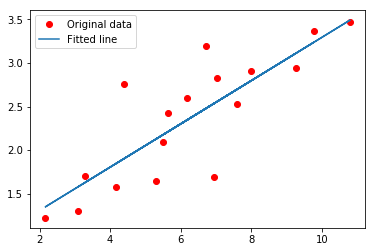

Testing... (Mean square loss Comparison)
Testing cost= 0.0793582
Absolute mean square loss difference: 0.00236098


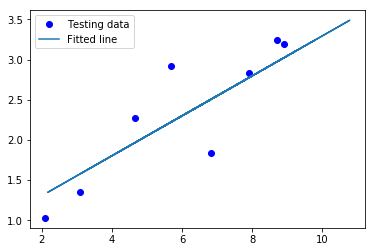

In [31]:
from __future__ import print_function

import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
#  Note, minimize() knows to modify W and b because Variable objects are trainable=True by default
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    # Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

    # Testing example, as requested (Issue #2)
    test_X = numpy.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
    test_Y = numpy.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

    print("Testing... (Mean square loss Comparison)")
 
    testing_cost = sess.run(
        tf.reduce_sum(tf.pow(pred - Y, 2)) / (2 * test_X.shape[0]),
        feed_dict={X: test_X, Y: test_Y})  # same function as cost above
    print("Testing cost=", testing_cost)
    print("Absolute mean square loss difference:", abs(
        training_cost - testing_cost))

    plt.plot(test_X, test_Y, 'bo', label='Testing data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [37]:
sess = tf.Session() 
x = [[1., 1.], [4., 4.]]
tf.reduce_mean(x) #==> 1.5
tf.reduce_mean(x, 0) #==> [1.5, 1.5]
q = tf.reduce_mean(x, 1) #==> [1.,  2.]

print(q.eval(session=sess))

[ 1.  4.]


In [38]:
from __future__ import print_function

import numpy as np
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# In this example, we limit mnist data
Xtr, Ytr = mnist.train.next_batch(5000) #5000 for training (nn candidates)
Xte, Yte = mnist.test.next_batch(200) #200 for testing

# tf Graph Input
xtr = tf.placeholder("float", [None, 784])
xte = tf.placeholder("float", [784])

# Nearest Neighbor calculation using L1 Distance
# Calculate L1 Distance
distance = tf.reduce_sum(tf.abs(tf.add(xtr, tf.negative(xte))), reduction_indices=1)
# Prediction: Get min distance index (Nearest neighbor)
pred = tf.arg_min(distance, 0)

accuracy = 0.

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # loop over test data
    for i in range(len(Xte)):
        # Get nearest neighbor
        nn_index = sess.run(pred, feed_dict={xtr: Xtr, xte: Xte[i, :]})
        # Get nearest neighbor class label and compare it to its true label
        print("Test", i, "Prediction:", np.argmax(Ytr[nn_index]), \
            "True Class:", np.argmax(Yte[i]))
        # Calculate accuracy
        if np.argmax(Ytr[nn_index]) == np.argmax(Yte[i]):
            accuracy += 1./len(Xte)
    print("Done!")
    print("Accuracy:", accuracy)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Test 0 Prediction: 8 True Class: 8
Test 1 Prediction: 1 True Class: 1
Test 2 Prediction: 8 True Class: 8
Test 3 Prediction: 5 True Class: 5
Test 4 Prediction: 3 True Class: 3
Test 5 Prediction: 9 True Class: 9
Test 6 Prediction: 9 True Class: 9
Test 7 Prediction: 4 True Class: 4
Test 8 Prediction: 8 True Class: 8
Test 9 Prediction: 2 True Class: 2
Test 10 Prediction: 9 True Class: 9
Test 11 Prediction: 5 True Class: 5
Test 12 Prediction: 4 True Class: 4
Test 13 Prediction: 3 True Class: 3
Test 14 Prediction: 3 True Class: 3
Test 15 Prediction: 4 T

In [40]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

# Parameters
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Network Parameters
n_hidden_1 = 256 # 1st layer num features
n_hidden_2 = 128 # 2nd layer num features
n_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error

cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    total_batch = int(mnist.train.num_examples/batch_size)
    # Training cycle
    for epoch in range(training_epochs):
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1),
                  "cost=", "{:.9f}".format(c))

    print("Optimization Finished!")

    # Applying encode and decode over test set
    encode_decode = sess.run(
        y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 10, figsize=(10, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    f.show()
    plt.draw()

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Epoch: 0001 cost= 0.206190869
Epoch: 0002 cost= 0.175334215
Epoch: 0003 cost= 0.154837668
Epoch: 0004 cost= 0.144388616
Epoch: 0005 cost= 0.137720257
Epoch: 0006 cost= 0.126068205
Epoch: 0007 cost= 0.118379325
Epoch: 0008 cost= 0.115986004
Epoch: 0009 cost= 0.111941375
Epoch: 0010 cost= 0.110486113
Epoch: 0011 cost= 0.108325087
Epoch: 0012 cost= 0.108702950
Epoch: 0013 cost= 0.107774787
Epoch: 0014 cost= 0.108424202
Epoch: 0015 cost= 0.107303582
Epoch: 0016 cost= 0.104797758
Epoch: 0017 cost= 0.104668513
Epoch: 0018 cost= 0.101659477
Epoch: 0019 cost= 0.101614065
Epoch: 0020 cost= 0.100921765
Optimization Finished!


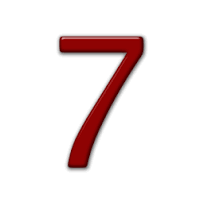

In [41]:
from IPython.display import Image
Image('7.png')

In [43]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
import time
from datetime import timedelta
import math
import os

# Use PrettyTensor to simplify Neural Network construction.
import prettytensor as pt

In [44]:
tf.__version__


'1.2.0'

In [45]:

from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/MNIST/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz


In [46]:
print("Size of:")
print("- Training-set:\t\t{}".format(len(data.train.labels)))
print("- Test-set:\t\t{}".format(len(data.test.labels)))
print("- Validation-set:\t{}".format(len(data.validation.labels)))

Size of:
- Training-set:		55000
- Test-set:		10000
- Validation-set:	5000


In [47]:

data.test.cls = np.argmax(data.test.labels, axis=1)
data.validation.cls = np.argmax(data.validation.labels, axis=1)

In [48]:
img_size = 28

# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size

# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)

# Number of colour channels for the images: 1 channel for gray-scale.
num_channels = 1

# Number of classes, one class for each of 10 digits.
num_classes = 10

In [49]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

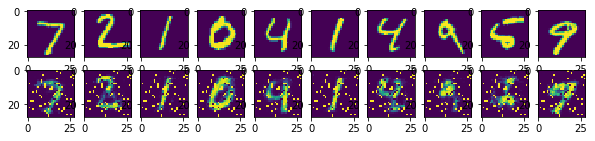

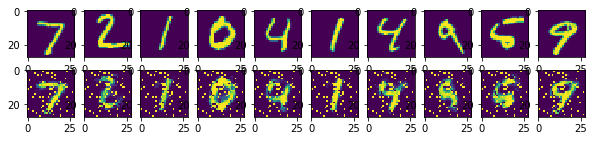

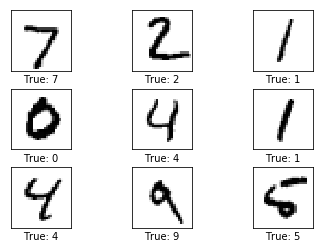

In [50]:
images = data.test.images[0:9]

# Get the true classes for those images.
cls_true = data.test.cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

In [51]:
x = tf.placeholder(tf.float32, shape=[None, img_size_flat], name='x')

In [52]:

x_image = tf.reshape(x, [-1, img_size, img_size, num_channels])

In [53]:
y_true = tf.placeholder(tf.float32, shape=[None, 10], name='y_true')

In [54]:
y_true_cls = tf.argmax(y_true, dimension=1)

In [55]:
x_pretty = pt.wrap(x_image)

In [56]:
with pt.defaults_scope(activation_fn=tf.nn.relu):
    y_pred, loss = x_pretty.\
        conv2d(kernel=5, depth=16, name='layer_conv1').\
        max_pool(kernel=2, stride=2).\
        conv2d(kernel=5, depth=36, name='layer_conv2').\
        max_pool(kernel=2, stride=2).\
        flatten().\
        fully_connected(size=128, name='layer_fc1').\
        softmax_classifier(num_classes=num_classes, labels=y_true)

In [57]:
def get_weights_variable(layer_name):
    # Retrieve an existing variable named 'weights' in the scope
    # with the given layer_name.
    # This is awkward because the TensorFlow function was
    # really intended for another purpose.

    with tf.variable_scope(layer_name, reuse=True):
        variable = tf.get_variable('weights')

    return variable

In [58]:
weights_conv1 = get_weights_variable(layer_name='layer_conv1')
weights_conv2 = get_weights_variable(layer_name='layer_conv2')

In [59]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(loss)

In [60]:

correct_prediction = tf.equal(y_pred_cls, y_true_cls)

NameError: name 'y_pred_cls' is not defined

In [61]:
y_pred_cls = tf.argmax(y_pred, dimension=1)

In [62]:
correct_prediction = tf.equal(y_pred_cls, y_true_cls)

In [63]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [64]:
saver = tf.train.Saver()

In [65]:
save_dir = 'checkpoints/'

In [66]:
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

In [67]:
save_path = os.path.join(save_dir, 'best_validation')

In [68]:
session = tf.Session()

In [69]:
def init_variables():
    session.run(tf.global_variables_initializer())

In [70]:
train_batch_size = 64

In [71]:
# Best validation accuracy seen so far.
best_validation_accuracy = 0.0

# Iteration-number for last improvement to validation accuracy.
last_improvement = 0

# Stop optimization if no improvement found in this many iterations.
require_improvement = 1000

In [72]:
total_iterations = 0

def optimize(num_iterations):
    # Ensure we update the global variables rather than local copies.
    global total_iterations
    global best_validation_accuracy
    global last_improvement

    # Start-time used for printing time-usage below.
    start_time = time.time()

    for i in range(num_iterations):

        # Increase the total number of iterations performed.
        # It is easier to update it in each iteration because
        # we need this number several times in the following.
        total_iterations += 1

        # Get a batch of training examples.
        # x_batch now holds a batch of images and
        # y_true_batch are the true labels for those images.
        x_batch, y_true_batch = data.train.next_batch(train_batch_size)

        # Put the batch into a dict with the proper names
        # for placeholder variables in the TensorFlow graph.
        feed_dict_train = {x: x_batch,
                           y_true: y_true_batch}

        # Run the optimizer using this batch of training data.
        # TensorFlow assigns the variables in feed_dict_train
        # to the placeholder variables and then runs the optimizer.
        session.run(optimizer, feed_dict=feed_dict_train)

        # Print status every 100 iterations and after last iteration.
        if (total_iterations % 100 == 0) or (i == (num_iterations - 1)):

            # Calculate the accuracy on the training-batch.
            acc_train = session.run(accuracy, feed_dict=feed_dict_train)

            # Calculate the accuracy on the validation-set.
            # The function returns 2 values but we only need the first.
            acc_validation, _ = validation_accuracy()

            # If validation accuracy is an improvement over best-known.
            if acc_validation > best_validation_accuracy:
                # Update the best-known validation accuracy.
                best_validation_accuracy = acc_validation
                
                # Set the iteration for the last improvement to current.
                last_improvement = total_iterations

                # Save all variables of the TensorFlow graph to file.
                saver.save(sess=session, save_path=save_path)

                # A string to be printed below, shows improvement found.
                improved_str = '*'
            else:
                # An empty string to be printed below.
                # Shows that no improvement was found.
                improved_str = ''
            
            # Status-message for printing.
            msg = "Iter: {0:>6}, Train-Batch Accuracy: {1:>6.1%}, Validation Acc: {2:>6.1%} {3}"

            # Print it.
            print(msg.format(i + 1, acc_train, acc_validation, improved_str))

        # If no improvement found in the required number of iterations.
        if total_iterations - last_improvement > require_improvement:
            print("No improvement found in a while, stopping optimization.")

            # Break out from the for-loop.
            break

    # Ending time.
    end_time = time.time()

    # Difference between start and end-times.
    time_dif = end_time - start_time

    # Print the time-usage.
    print("Time usage: " + str(timedelta(seconds=int(round(time_dif)))))

In [73]:
def plot_example_errors(cls_pred, correct):
    # This function is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # correct is a boolean array whether the predicted class
    # is equal to the true class for each image in the test-set.

    # Negate the boolean array.
    incorrect = (correct == False)
    
    # Get the images from the test-set that have been
    # incorrectly classified.
    images = data.test.images[incorrect]
    
    # Get the predicted classes for those images.
    cls_pred = cls_pred[incorrect]

    # Get the true classes for those images.
    cls_true = data.test.cls[incorrect]
    
    # Plot the first 9 images.
    plot_images(images=images[0:9],
                cls_true=cls_true[0:9],
                cls_pred=cls_pred[0:9])

In [74]:
def plot_confusion_matrix(cls_pred):
    # This is called from print_test_accuracy() below.

    # cls_pred is an array of the predicted class-number for
    # all images in the test-set.

    # Get the true classifications for the test-set.
    cls_true = data.test.cls
    
    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=cls_true,
                          y_pred=cls_pred)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.matshow(cm)

    # Make various adjustments to the plot.
    plt.colorbar()
    tick_marks = np.arange(num_classes)
    plt.xticks(tick_marks, range(num_classes))
    plt.yticks(tick_marks, range(num_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [75]:
# Split the data-set in batches of this size to limit RAM usage.
batch_size = 256

def predict_cls(images, labels, cls_true):
    # Number of images.
    num_images = len(images)

    # Allocate an array for the predicted classes which
    # will be calculated in batches and filled into this array.
    cls_pred = np.zeros(shape=num_images, dtype=np.int)

    # Now calculate the predicted classes for the batches.
    # We will just iterate through all the batches.
    # There might be a more clever and Pythonic way of doing this.

    # The starting index for the next batch is denoted i.
    i = 0

    while i < num_images:
        # The ending index for the next batch is denoted j.
        j = min(i + batch_size, num_images)

        # Create a feed-dict with the images and labels
        # between index i and j.
        feed_dict = {x: images[i:j, :],
                     y_true: labels[i:j, :]}

        # Calculate the predicted class using TensorFlow.
        cls_pred[i:j] = session.run(y_pred_cls, feed_dict=feed_dict)

        # Set the start-index for the next batch to the
        # end-index of the current batch.
        i = j

    # Create a boolean array whether each image is correctly classified.
    correct = (cls_true == cls_pred)

    return correct, cls_pred

In [76]:

def predict_cls_test():
    return predict_cls(images = data.test.images,
                       labels = data.test.labels,
                       cls_true = data.test.cls)

In [77]:

def predict_cls_validation():
    return predict_cls(images = data.validation.images,
                       labels = data.validation.labels,
                       cls_true = data.validation.cls)

In [78]:

def cls_accuracy(correct):
    # Calculate the number of correctly classified images.
    # When summing a boolean array, False means 0 and True means 1.
    correct_sum = correct.sum()

    # Classification accuracy is the number of correctly classified
    # images divided by the total number of images in the test-set.
    acc = float(correct_sum) / len(correct)

    return acc, correct_sum

In [79]:
def validation_accuracy():
    # Get the array of booleans whether the classifications are correct
    # for the validation-set.
    # The function returns two values but we only need the first.
    correct, _ = predict_cls_validation()
    
    # Calculate the classification accuracy and return it.
    return cls_accuracy(correct)

In [80]:
def print_test_accuracy(show_example_errors=False,
                        show_confusion_matrix=False):

    # For all the images in the test-set,
    # calculate the predicted classes and whether they are correct.
    correct, cls_pred = predict_cls_test()

    # Classification accuracy and the number of correct classifications.
    acc, num_correct = cls_accuracy(correct)
    
    # Number of images being classified.
    num_images = len(correct)

    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2})"
    print(msg.format(acc, num_correct, num_images))

    # Plot some examples of mis-classifications, if desired.
    if show_example_errors:
        print("Example errors:")
        plot_example_errors(cls_pred=cls_pred, correct=correct)

    # Plot the confusion matrix, if desired.
    if show_confusion_matrix:
        print("Confusion Matrix:")
        plot_confusion_matrix(cls_pred=cls_pred)

In [81]:
def plot_conv_weights(weights, input_channel=0):
    # Assume weights are TensorFlow ops for 4-dim variables
    # e.g. weights_conv1 or weights_conv2.

    # Retrieve the values of the weight-variables from TensorFlow.
    # A feed-dict is not necessary because nothing is calculated.
    w = session.run(weights)

    # Print mean and standard deviation.
    print("Mean: {0:.5f}, Stdev: {1:.5f}".format(w.mean(), w.std()))
    
    # Get the lowest and highest values for the weights.
    # This is used to correct the colour intensity across
    # the images so they can be compared with each other.
    w_min = np.min(w)
    w_max = np.max(w)

    # Number of filters used in the conv. layer.
    num_filters = w.shape[3]

    # Number of grids to plot.
    # Rounded-up, square-root of the number of filters.
    num_grids = math.ceil(math.sqrt(num_filters))
    
    # Create figure with a grid of sub-plots.
    fig, axes = plt.subplots(num_grids, num_grids)

    # Plot all the filter-weights.
    for i, ax in enumerate(axes.flat):
        # Only plot the valid filter-weights.
        if i<num_filters:
            # Get the weights for the i'th filter of the input channel.
            # The format of this 4-dim tensor is determined by the
            # TensorFlow API. See Tutorial #02 for more details.
            img = w[:, :, input_channel, i]

            # Plot image.
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [82]:
print_test_accuracy()

FailedPreconditionError: Attempting to use uninitialized value layer_conv1/weights
	 [[Node: layer_conv1/weights/read = Identity[T=DT_FLOAT, _class=["loc:@layer_conv1/weights"], _device="/job:localhost/replica:0/task:0/gpu:0"](layer_conv1/weights)]]
	 [[Node: flatten/reshape/Shape/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_25_flatten/reshape/Shape", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op u'layer_conv1/weights/read', defined at:
  File "/usr/lib/python2.7/runpy.py", line 162, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", line 160, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python2.7/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 433, in _handle_events
    self._handle_recv()
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 465, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/zmqstream.py", line 407, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2718, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2822, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-56-ab75212e54e0>", line 2, in <module>
    y_pred, loss = x_pretty.        conv2d(kernel=5, depth=16, name='layer_conv1').        max_pool(kernel=2, stride=2).        conv2d(kernel=5, depth=36, name='layer_conv2').        max_pool(kernel=2, stride=2).        flatten().        fully_connected(size=128, name='layer_fc1').        softmax_classifier(num_classes=num_classes, labels=y_true)
  File "/usr/local/lib/python2.7/dist-packages/prettytensor/pretty_tensor_class.py", line 1972, in method
    result = func(non_seq_layer, *args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/prettytensor/pretty_tensor_image_methods.py", line 211, in __call__
    self.variable('weights', size, weights, dt=dtype),
  File "/usr/local/lib/python2.7/dist-packages/prettytensor/pretty_tensor_class.py", line 1673, in variable
    collections=variable_collections)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variable_scope.py", line 1065, in get_variable
    use_resource=use_resource, custom_getter=custom_getter)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variable_scope.py", line 962, in get_variable
    use_resource=use_resource, custom_getter=custom_getter)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variable_scope.py", line 367, in get_variable
    validate_shape=validate_shape, use_resource=use_resource)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variable_scope.py", line 352, in _true_getter
    use_resource=use_resource)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variable_scope.py", line 725, in _get_single_variable
    validate_shape=validate_shape)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variables.py", line 200, in __init__
    expected_shape=expected_shape)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/variables.py", line 319, in _init_from_args
    self._snapshot = array_ops.identity(self._variable, name="read")
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/gen_array_ops.py", line 1303, in identity
    result = _op_def_lib.apply_op("Identity", input=input, name=name)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/usr/local/lib/python2.7/dist-packages/tensorflow/python/framework/ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

FailedPreconditionError (see above for traceback): Attempting to use uninitialized value layer_conv1/weights
	 [[Node: layer_conv1/weights/read = Identity[T=DT_FLOAT, _class=["loc:@layer_conv1/weights"], _device="/job:localhost/replica:0/task:0/gpu:0"](layer_conv1/weights)]]
	 [[Node: flatten/reshape/Shape/_3 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_25_flatten/reshape/Shape", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


In [83]:
plot_conv_weights(weights=weights_conv1)

FailedPreconditionError: Attempting to use uninitialized value layer_conv1/weights
	 [[Node: layer_conv1/weights/_8 = _Send[T=DT_FLOAT, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_4_layer_conv1/weights", _device="/job:localhost/replica:0/task:0/gpu:0"](layer_conv1/weights)]]
	 [[Node: layer_conv1/weights/_9 = _Recv[_start_time=0, client_terminated=false, recv_device="/job:localhost/replica:0/task:0/cpu:0", send_device="/job:localhost/replica:0/task:0/gpu:0", send_device_incarnation=1, tensor_name="edge_4_layer_conv1/weights", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/cpu:0"]()]]